In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from axes import phy_axes
%matplotlib inline

# retina display
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = [10, 5]


In [2]:
x = np.linspace(0, 10, 300)

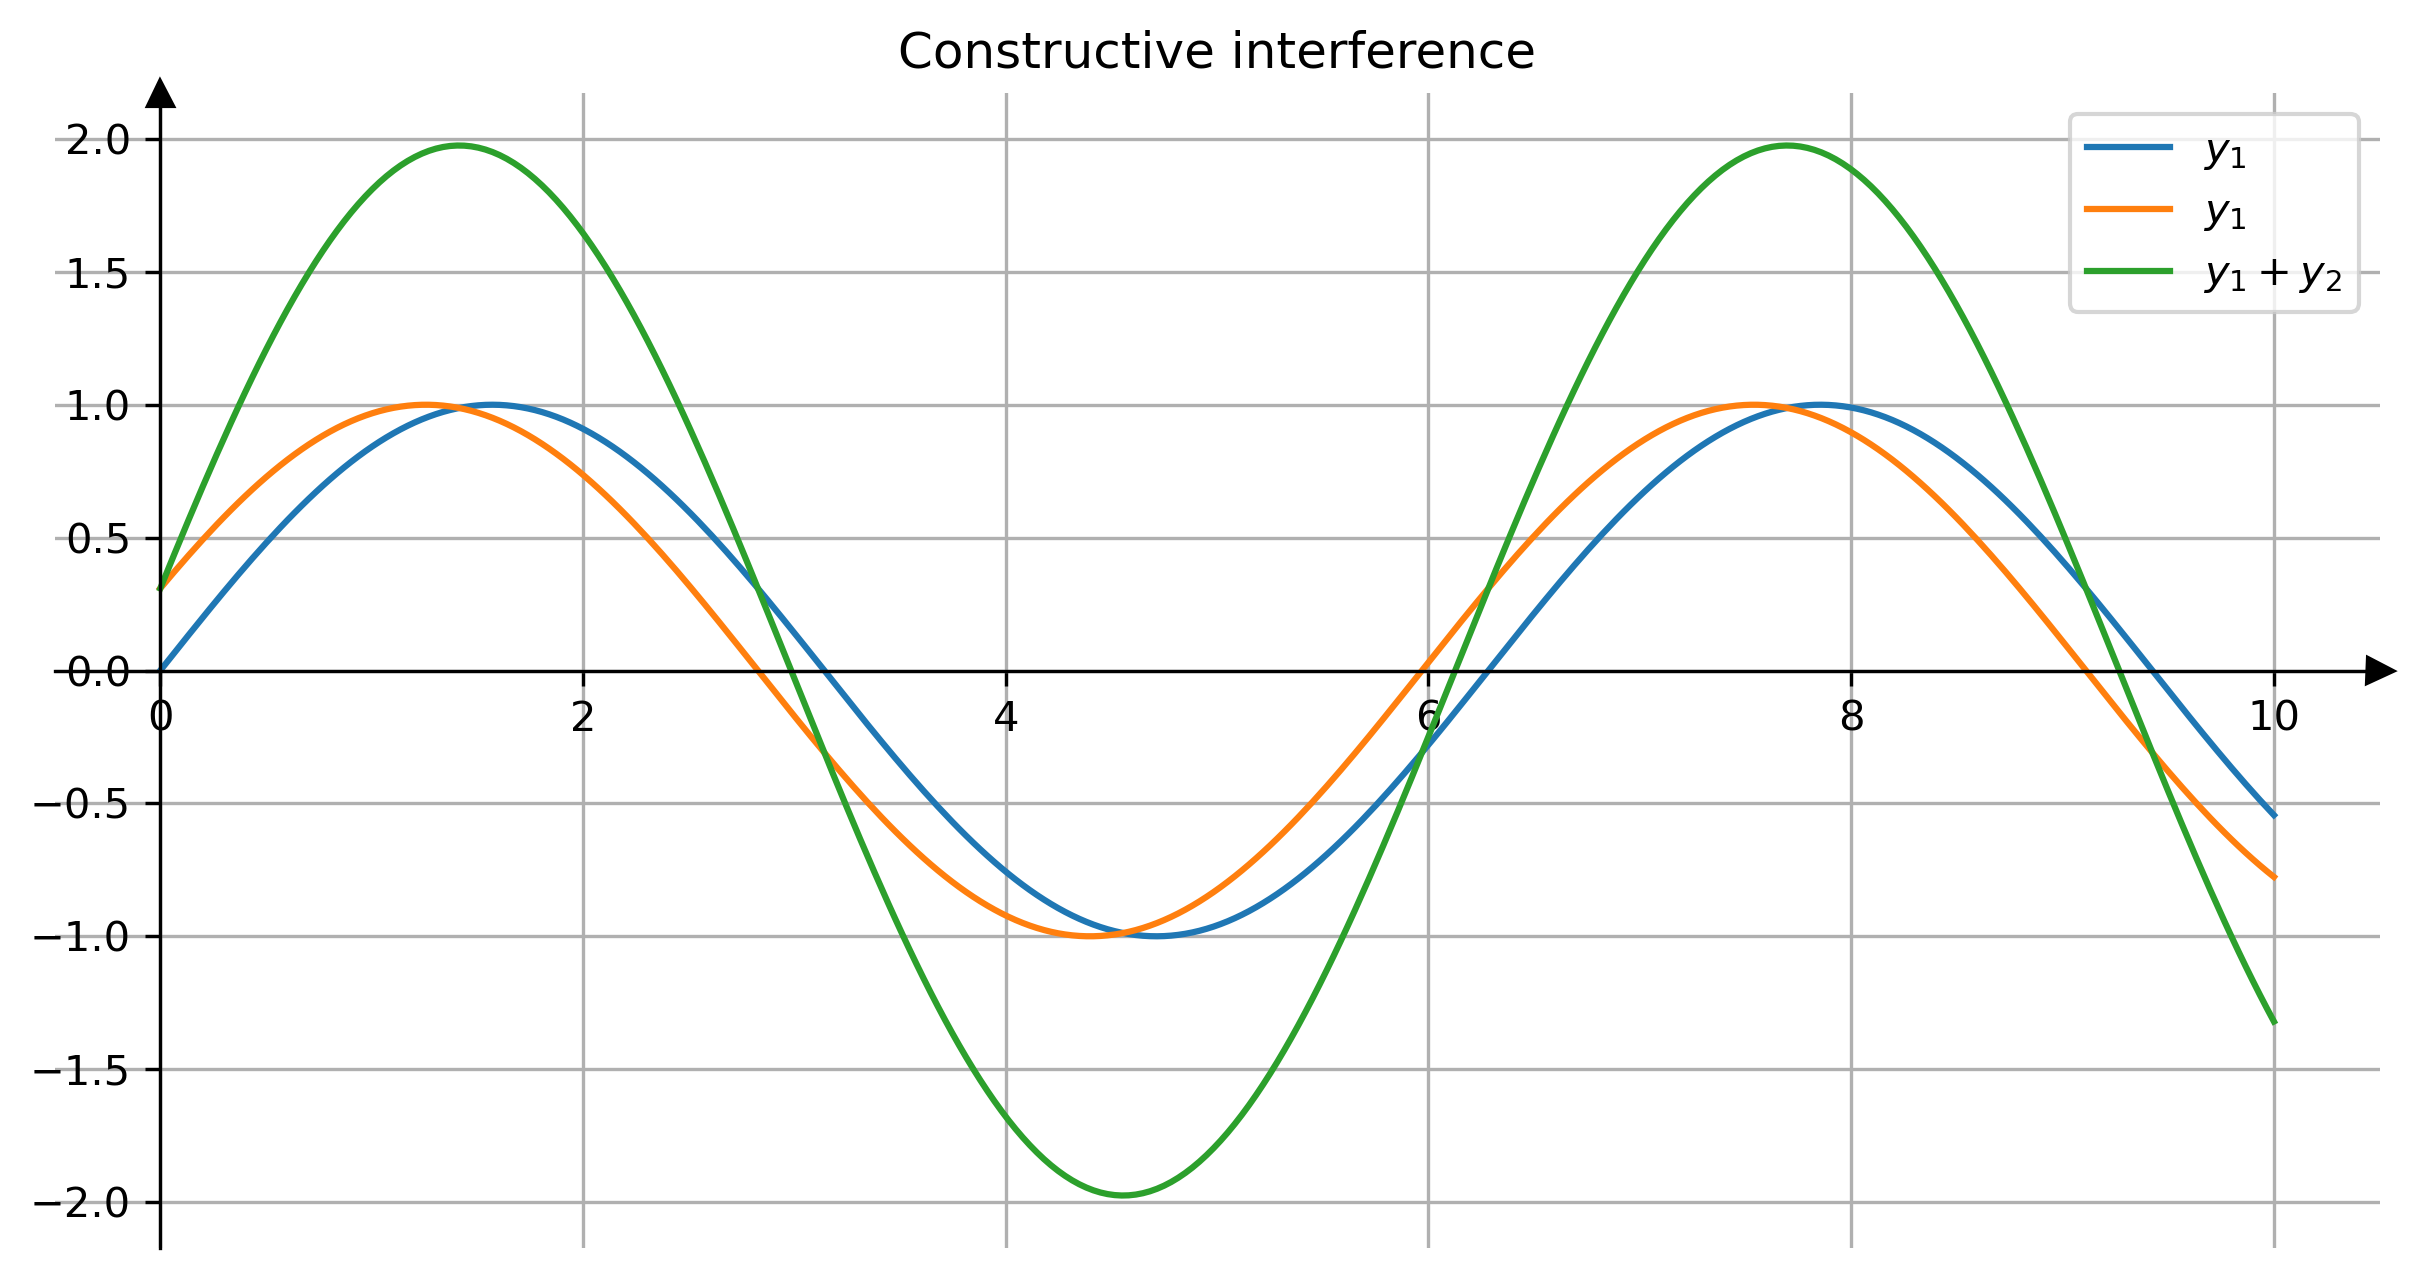

In [3]:
y1 = np.sin(x)
y2 = np.sin(x+0.1*np.pi)
plt.plot(x,y1,label="$y_1$")
plt.plot(x,y2,label="$y_1$")
plt.plot(x,y1+y2,label="$y_1+y_2$")
plt.grid(True)
plt.title('Constructive interference')
plt.legend()
phy_axes()
plt.savefig('lec20_constructive.png')

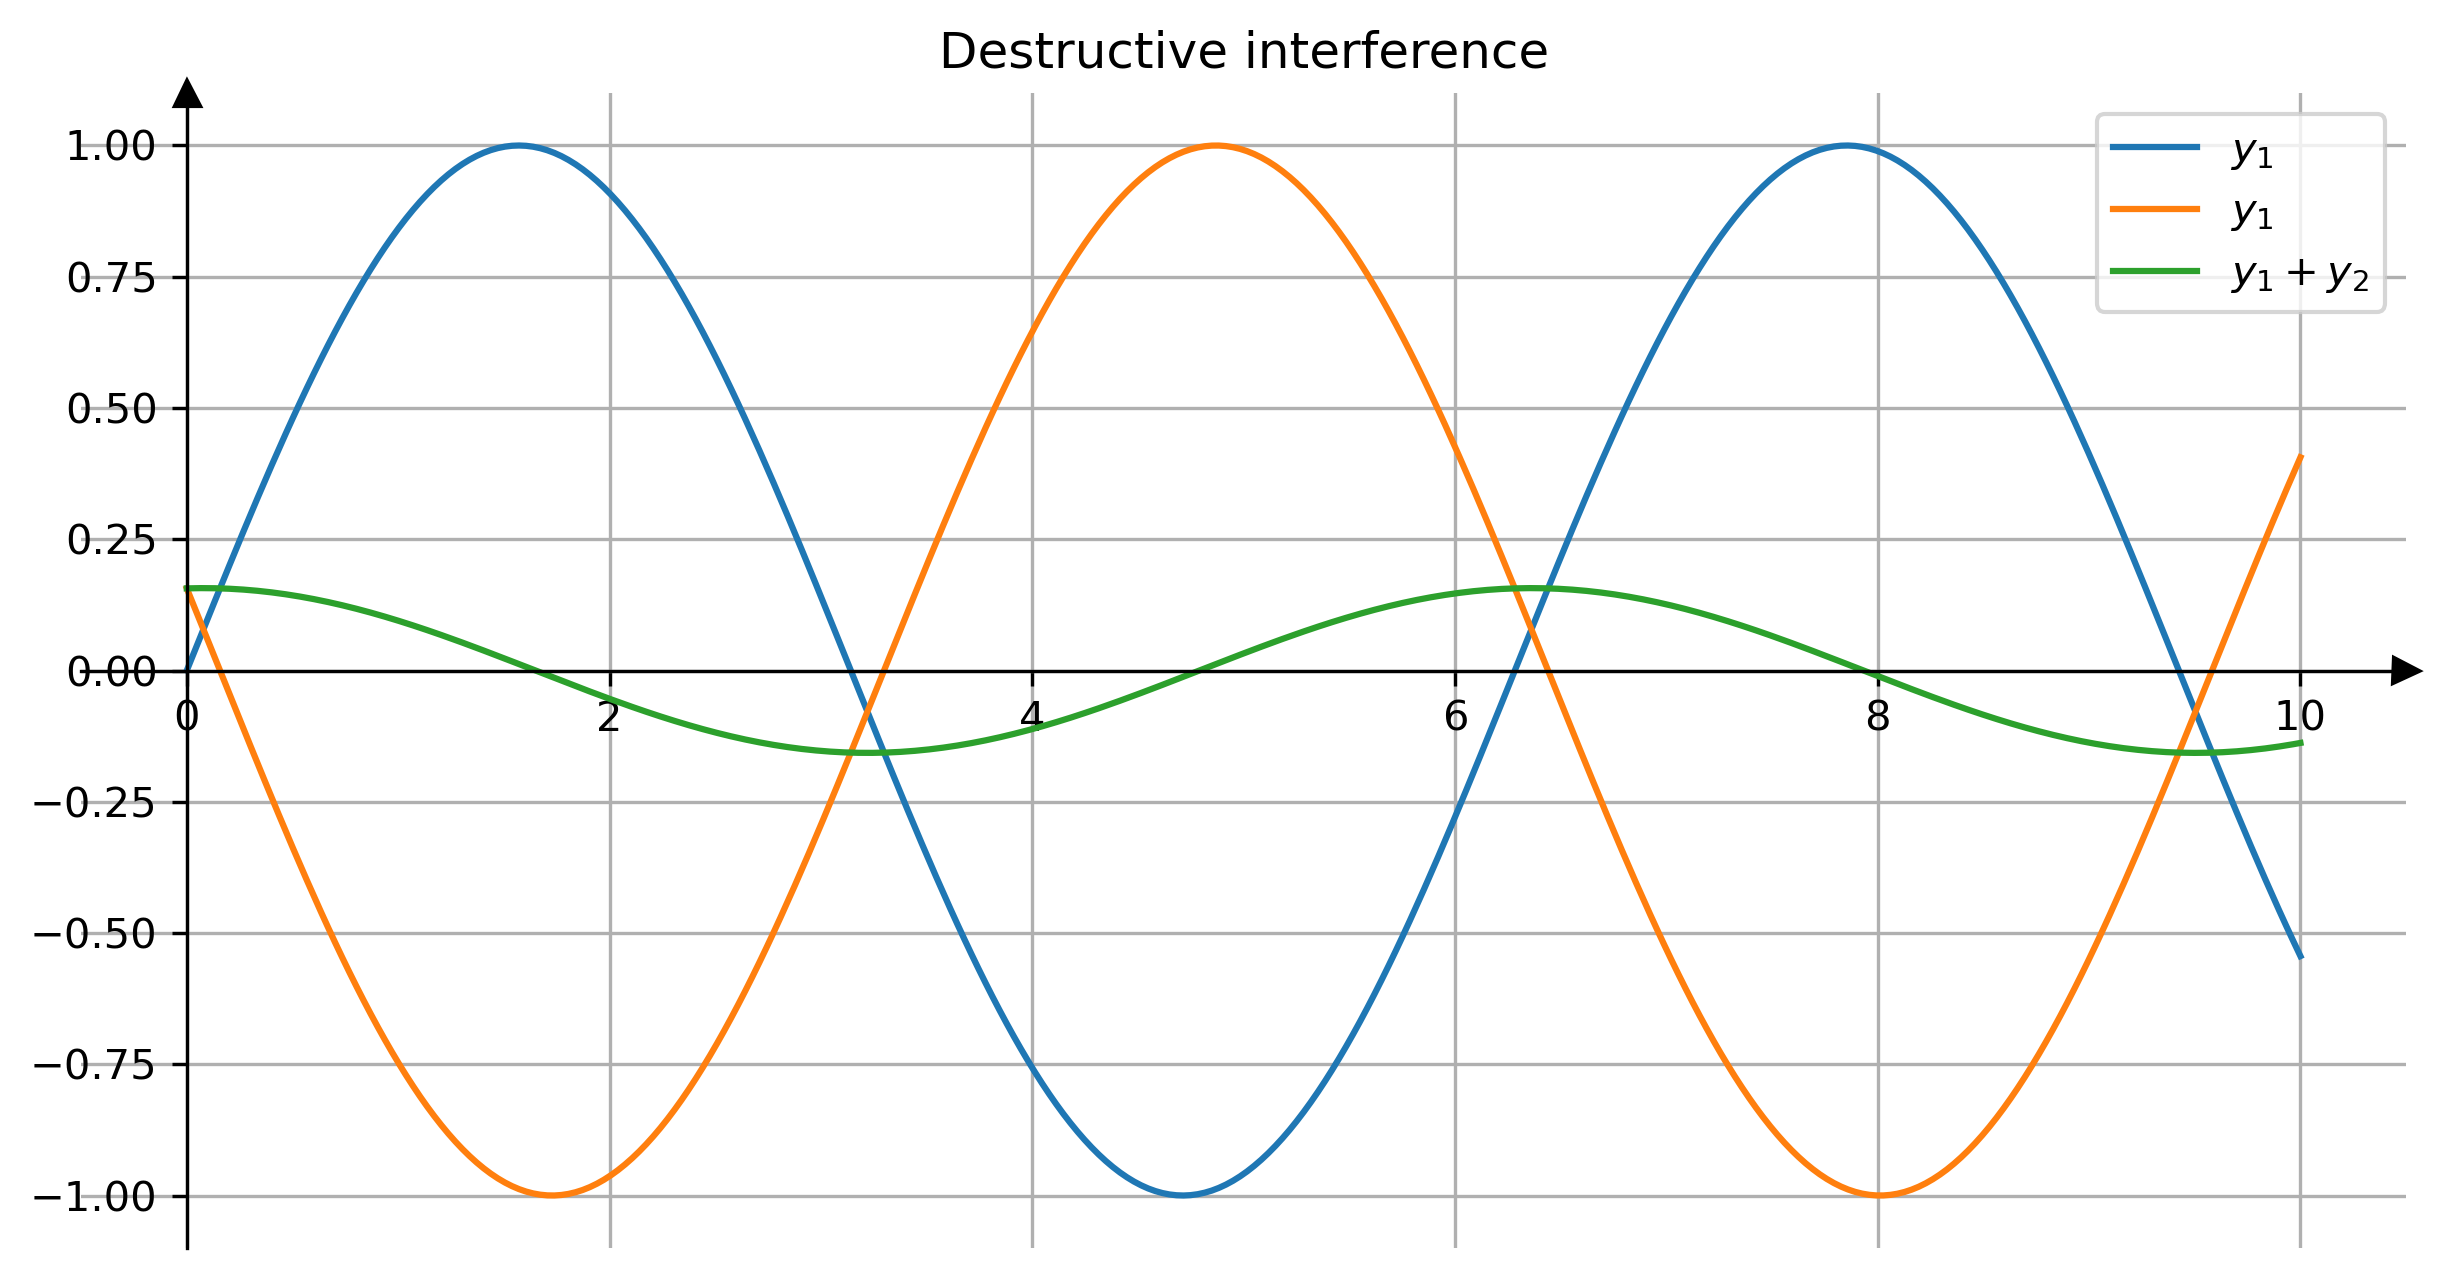

In [4]:
#y1 = np.sin(x)
y2 = np.sin(x+0.95*np.pi)
plt.plot(x,y1,label="$y_1$")
plt.plot(x,y2,label="$y_1$")
plt.plot(x,y1+y2,label="$y_1+y_2$")
plt.grid(True)
plt.title('Destructive interference')
plt.legend()
phy_axes()
plt.savefig('lec20_destructive.png')

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

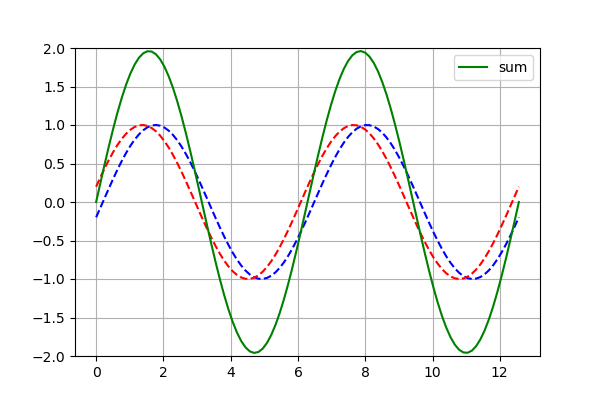

In [5]:
# use widget rather than inline plot
%matplotlib widget
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = [10, 5]

# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-2, 2])
ax.grid(True)
 
# generate x values
xx = np.linspace(0, 4 * np.pi, 100)

 
 
@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0.2):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]

    yy1 = amp*np.sin(w*(xx+phi))
    yy2 = amp*np.sin(w*(xx-phi))
    yy3 = yy1 + yy2
    print(len(ax.lines))



    ax.plot(xx,yy2, 'b--')#,label='$a\sin(kx-\phi)$')
    ax.plot(xx,yy1, 'r--')#, label='$a\sin(kx+\phi)$')

    ax.plot(xx,yy3, 'g', label='sum')

    plt.legend()


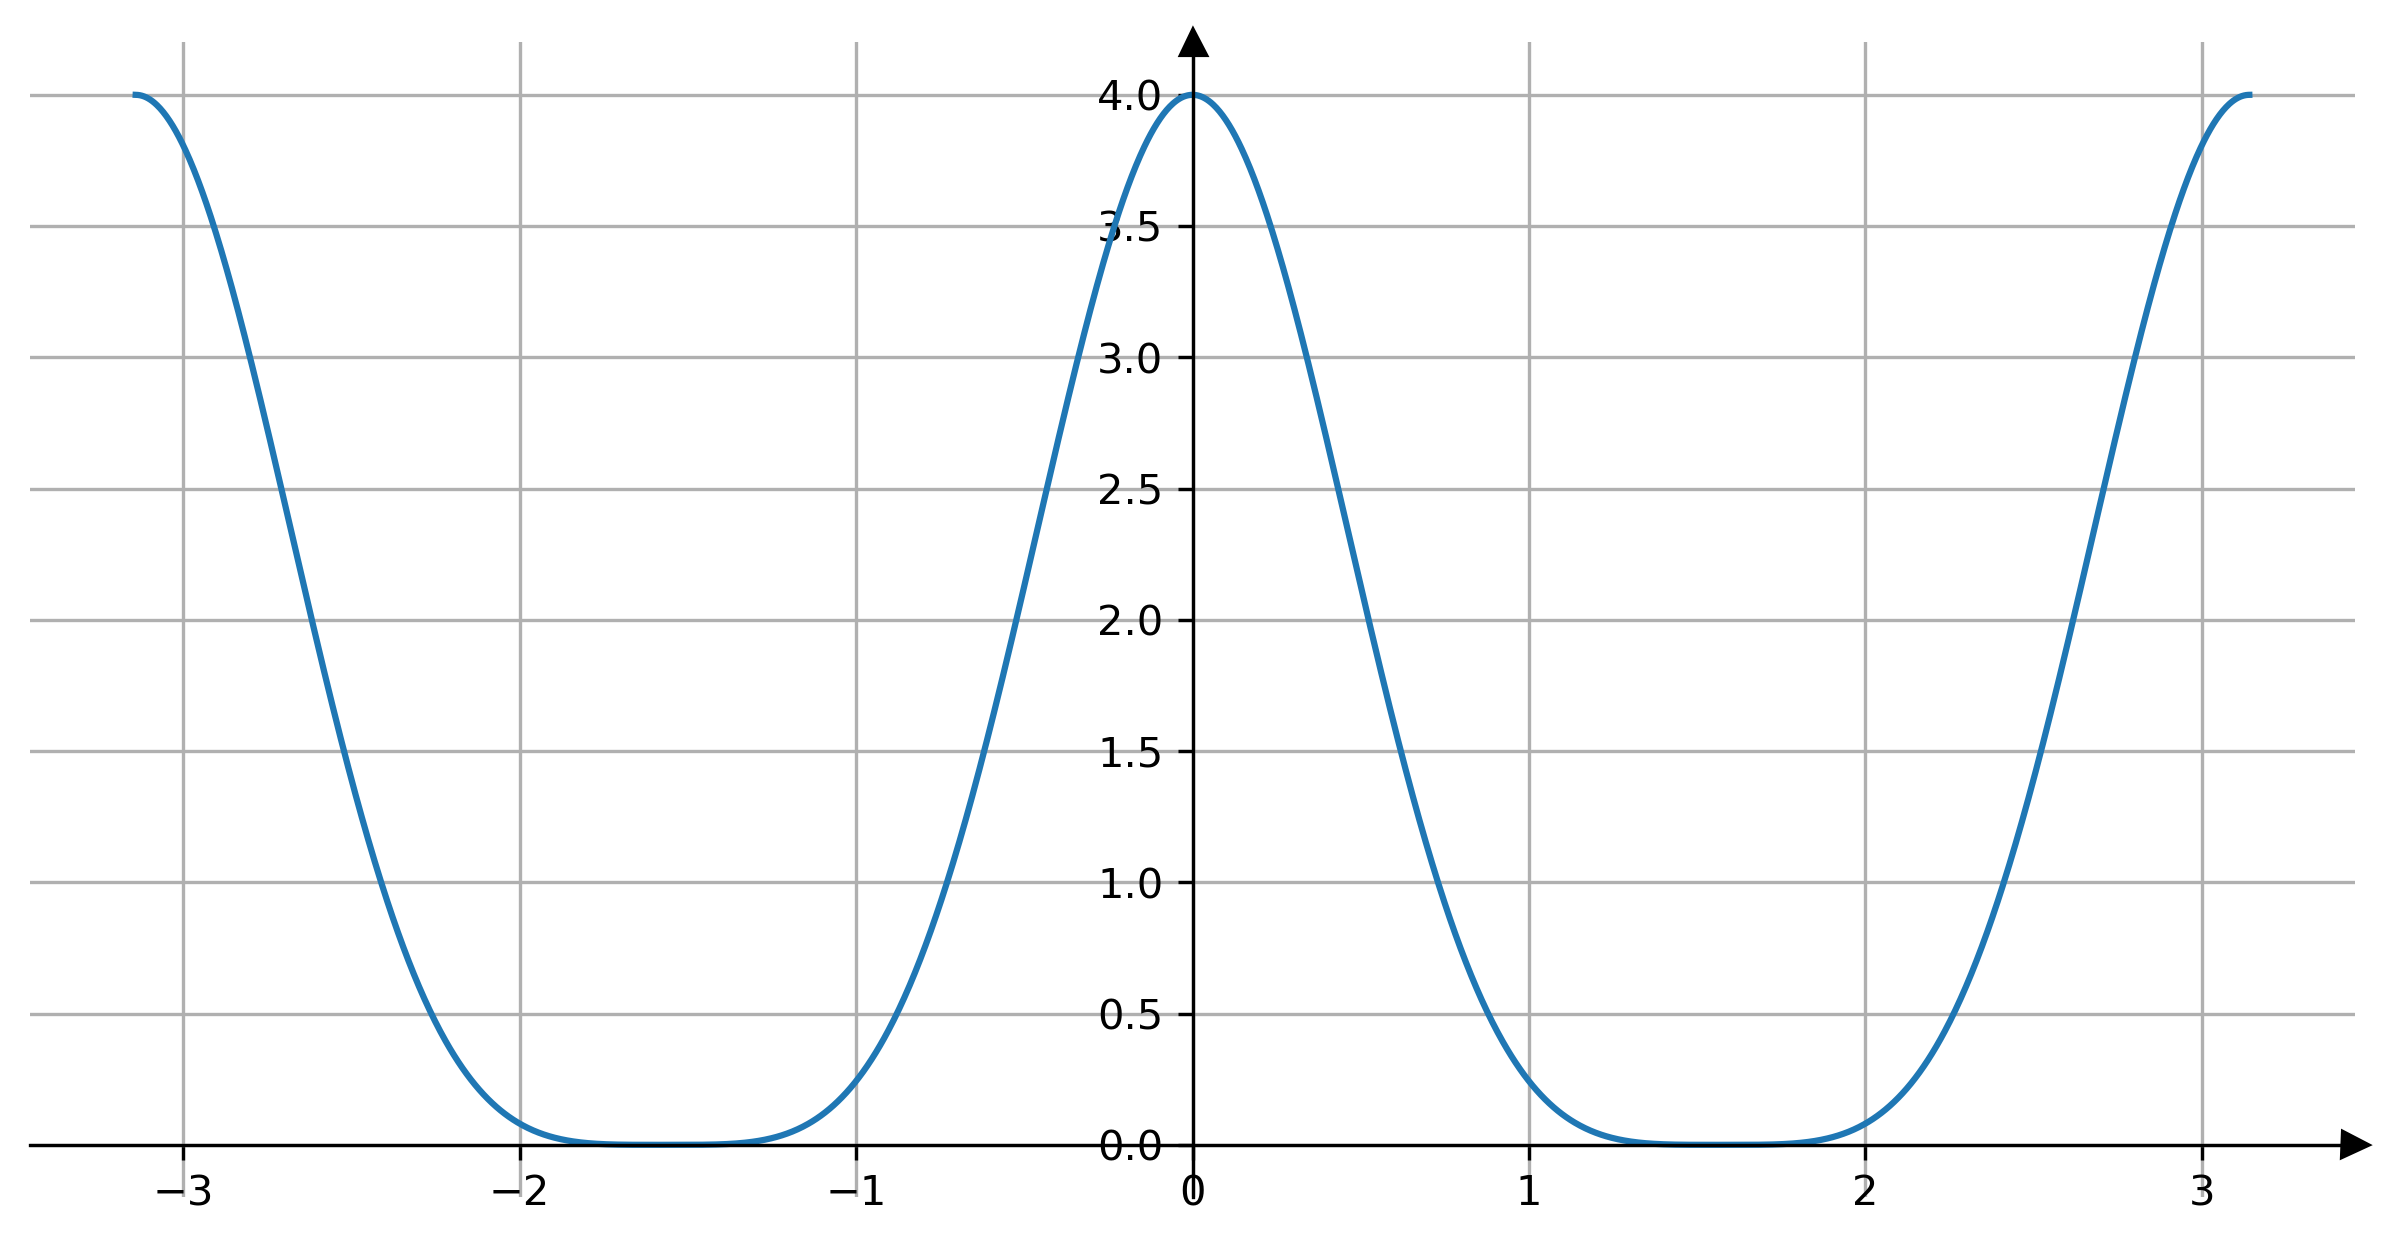

In [11]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = [10, 5]

theta = np.linspace(-np.pi, np.pi, 2000)
llambda = 1
b = 0.5 * llambda # typical choice for directional antenna
I0=1
I=4*I0* np.cos(np.pi/llambda * (b *np.sin(theta)))**2
plt.plot(theta, I)
phy_axes()


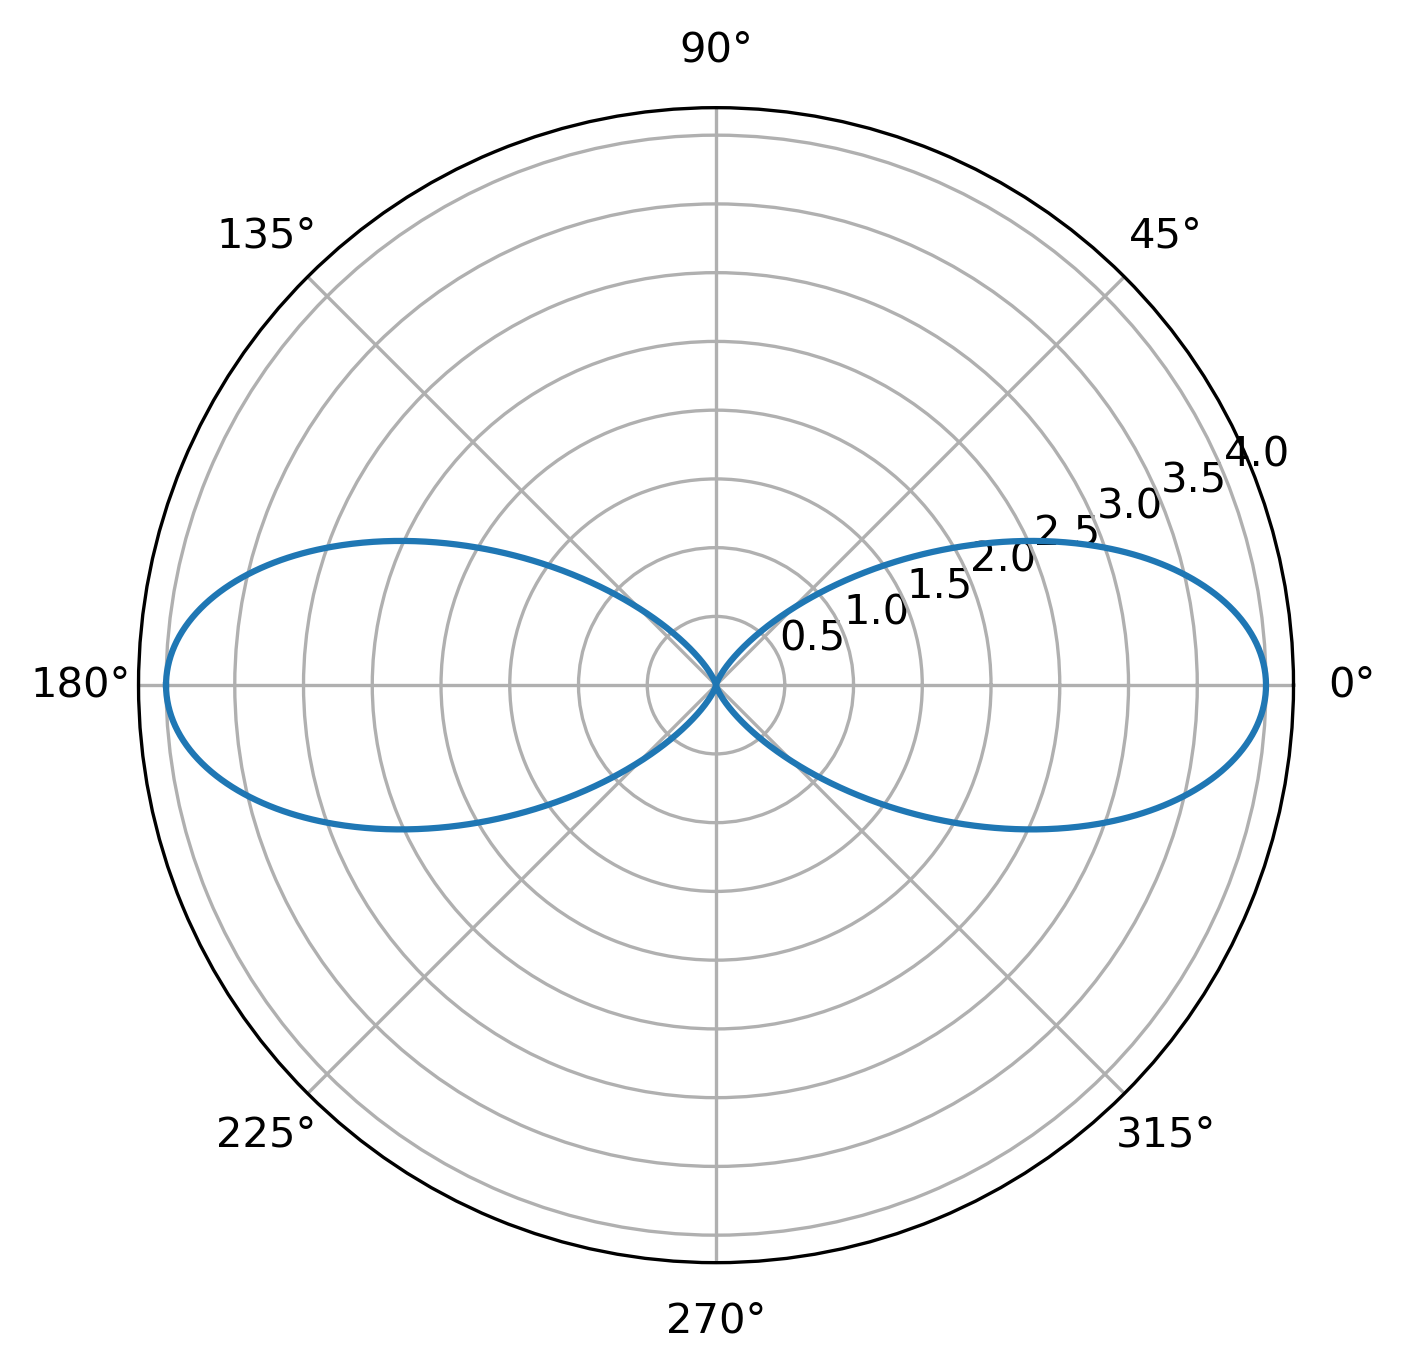

In [12]:
plt.polar(theta, I)
plt.savefig("lec20_dipole_polar.png")

In [8]:
# variable is called stheta, but it's the entire argument of the 
# cosine
stheta = np.linspace(-5,5,2500)
I=4*I0* np.cos(stheta)**2
plt.plot(stheta,I)
plt.ylabel("Intensity/$I_0$")
#plt.xlabel(r"{b\sin\theta}{2}$")
plt.xlabel(r"$\frac{\pi b\sin\theta}{\lambda}$")

phy_axes()
plt.savefig("lec20_dipole_i_vs_sintheta.png")


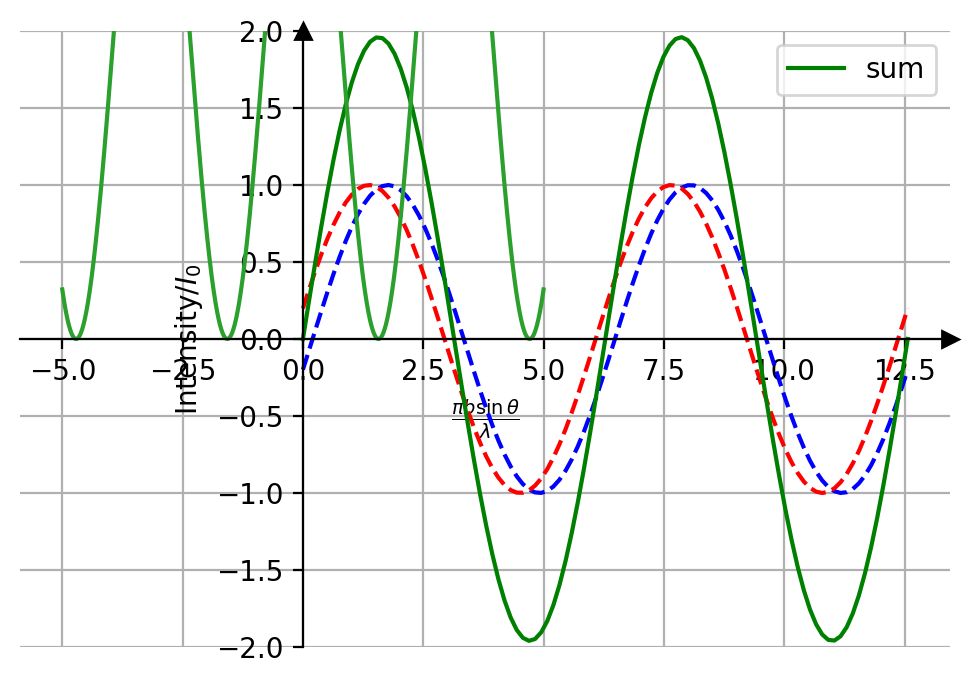

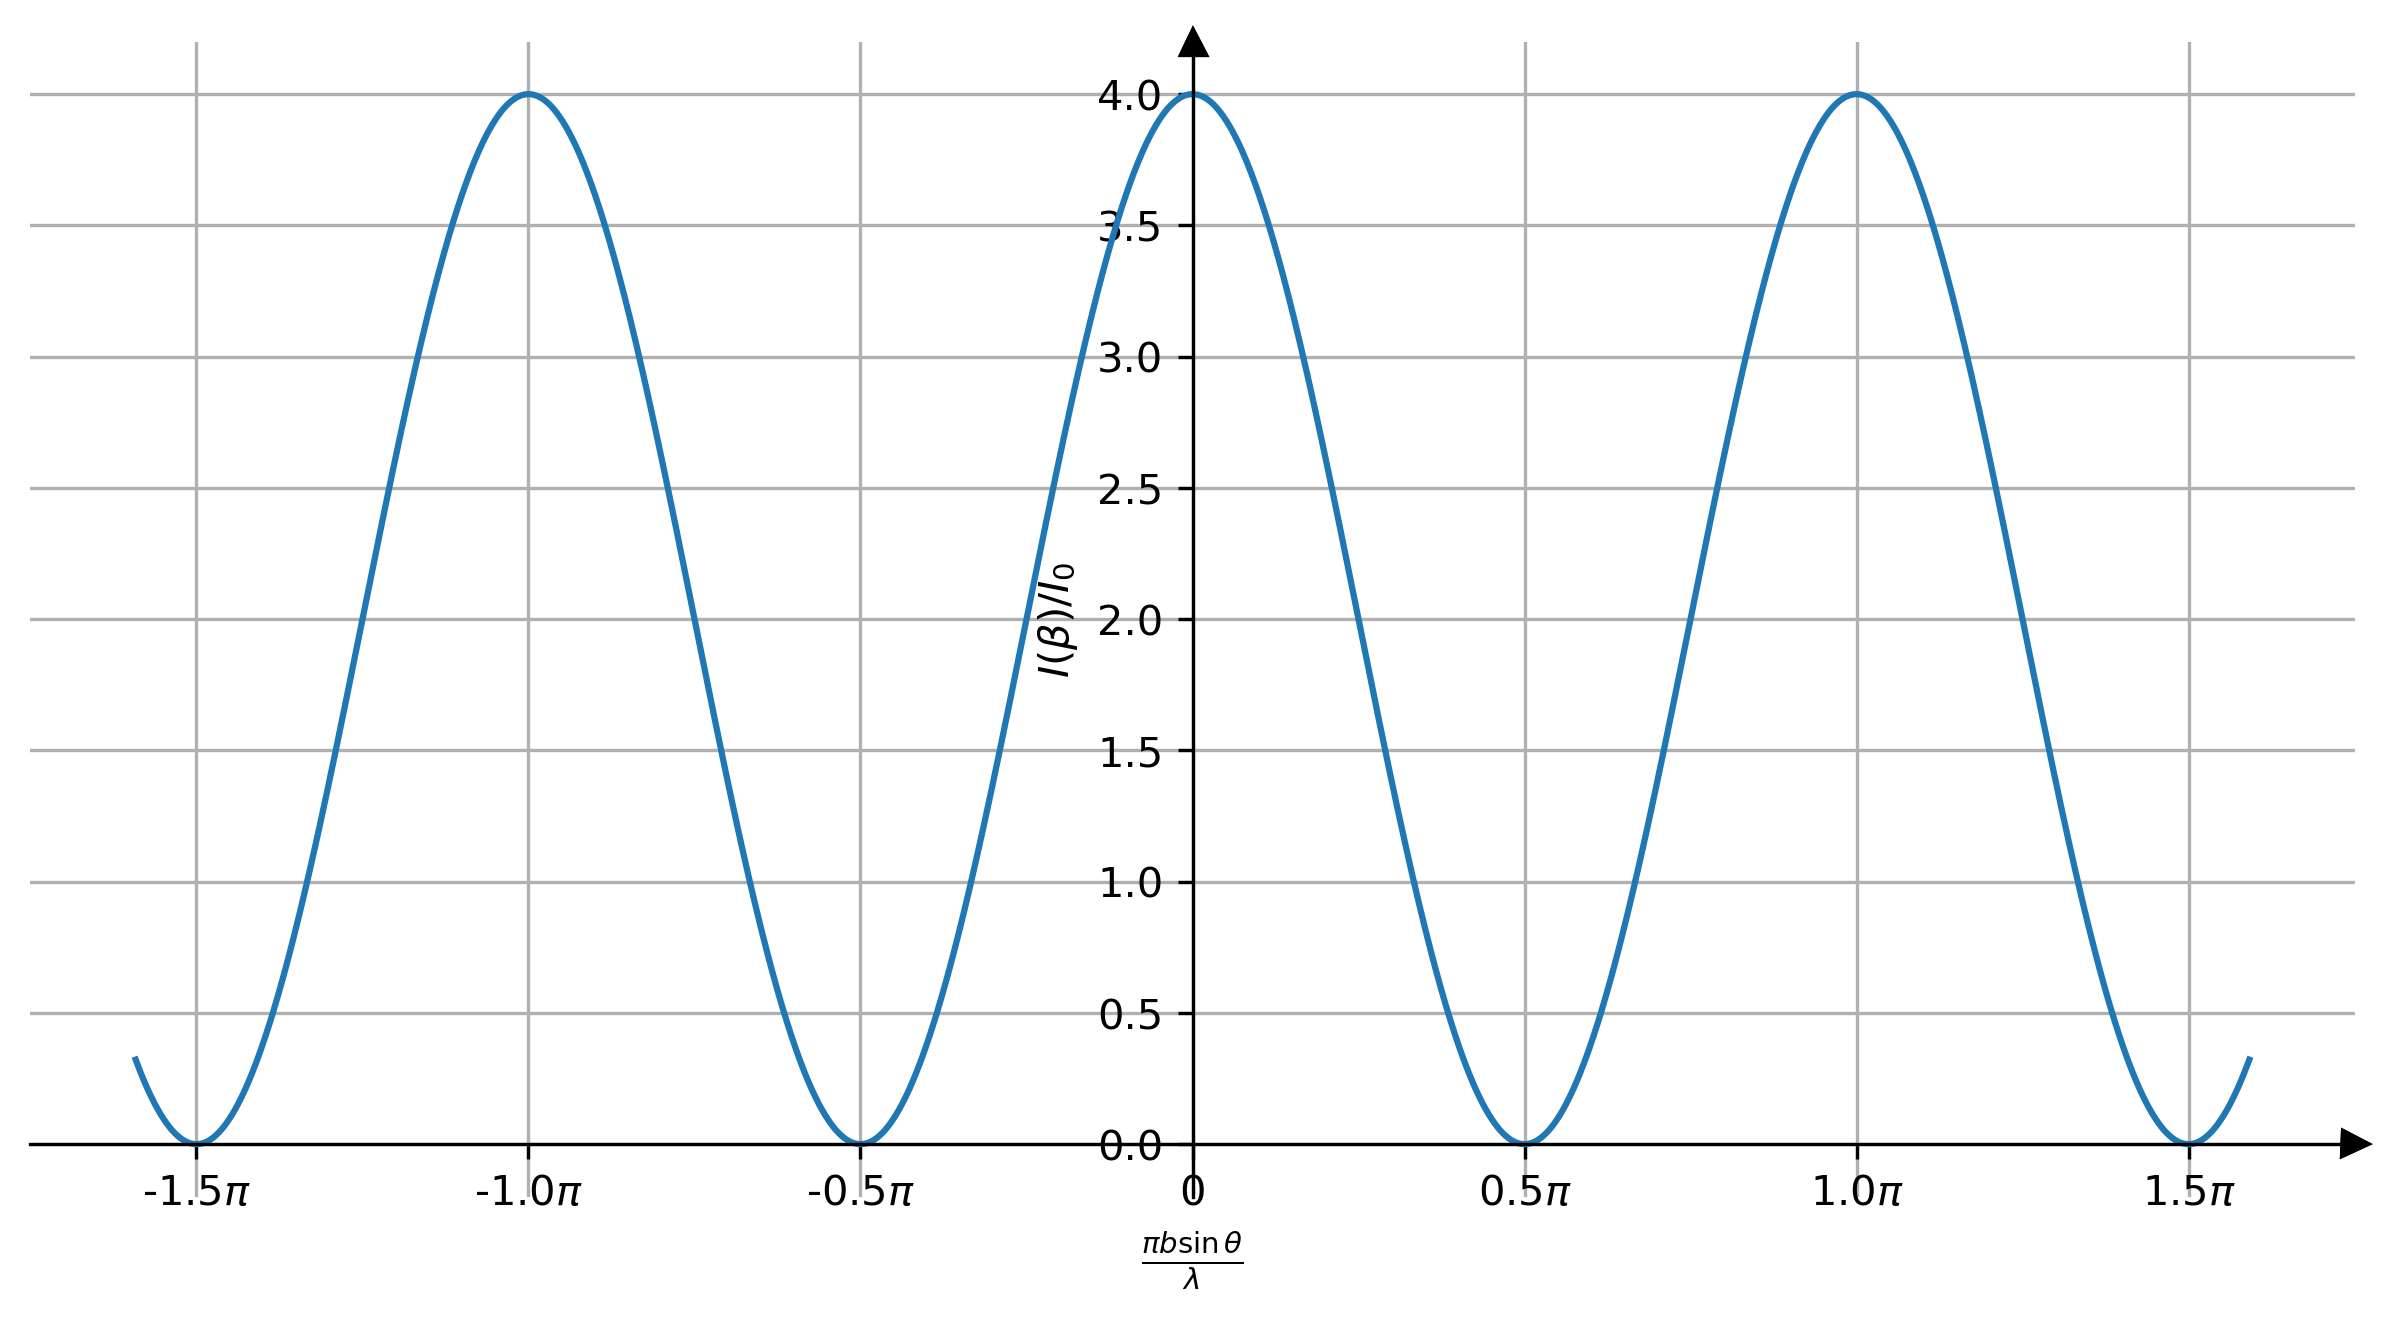

In [9]:
from matplotlib.ticker import FuncFormatter, MultipleLocator
# variable is called stheta, but it's the entire argument of the
# cosine
stheta = np.linspace(-5,5,2500)
I=4*I0* np.cos(stheta)**2
fig, ax = plt.subplots()
ax.plot(stheta, I)
plt.ylabel("Intensity/$I_0$")
#plt.xlabel(r"{b\sin\theta}{2}$")
plt.xlabel(r"$\frac{\pi b\sin\theta}{\lambda}$")
ax.xaxis.set_major_formatter(FuncFormatter(
    lambda val, pos: '{:2.1f}$\pi$'.format(1.0*val/np.pi) if val != 0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi/2))
plt.ylabel('$I(\\beta)/I_0$')
phy_axes()

phy_axes()
plt.savefig("lec20_dipole_i_vs_sintheta.png")
